# Simulador de daltonismo

Bruna Kimura e Elisa Malzoni


###### Introdução


Este primeiro projeto consiste em simular em imagens como um daltônico (protanopia e deuteranopia) as veriam. Para tanto foi utilizado como base o artigo _Digital Video Colourmaps for Checkinh the Legibility of Displays by Dichromats_ de Viénot, Brettel e Mollon. Para cada imagem é aplicado um tratamento pixel a pixel para mdificar a tonalidade e trazer as imagens o mais próximo possível à visão de um daltônico

In [1]:
#importações iniciais
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

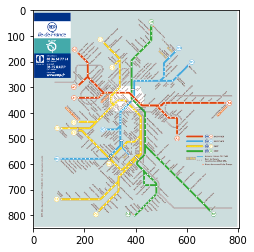

In [2]:
#lendo a imagem original
img = cv2.imread('original.png')

# invertendo as componentes de cor BGR para RGB
img = img[:, :, ::-1]
plt.imshow(img)

Para simular cada um dos passos, utilizamos a imagem usada no próprio artigo

## Simulador de protanopia e deuteranopia

### Passo 1:

O primeiro passo é ajustar os tons de RGB para o monitor

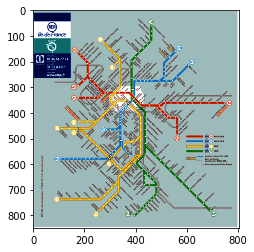

In [3]:
#multiplicando cada um dos pixels, criando uma nova imagem com um novo tom, ajustado para o monitor do artigo
new_img = (img / 255.0) ** 2.2
plt.imshow(new_img)

### Passo 2:
Tendo os valores em RGB, o próximo passo é ajustar o fluxo RGB

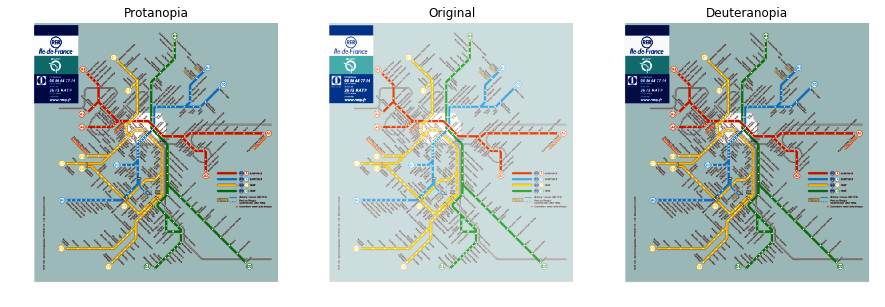

In [4]:
#para cada caso de daltonismo é necessário multiplicar os pixels para a seguinte equação
pro_img = (new_img * 0.992052) + 0.003974
deu_img = (new_img * 0.957237) + 0.0213814

f, axarr = plt.subplots(1,3)

f.set_figheight(15)
f.set_figwidth(15)

axarr[0].axis('off')
axarr[0].set_title('Protanopia')
axarr[0].imshow(pro_img)

axarr[1].axis('off')
axarr[1].set_title('Original')
axarr[1].imshow(img)

axarr[2].axis('off')
axarr[2].set_title('Deuteranopia')
axarr[2].imshow(deu_img)


As imagens acima representam a imagem normal (central), imagem com ajuste de fluxo para protanopia (esquerda) e deuteranopia (direita) respectivamente.

### Passo 3:
Transformar o RGB em sinais LMS

In [5]:
#Matriz dada pelo artigo para tranformação de RGB para LMS
RGB_to_LMS = np.array([[17.8824, 43.5161, 4.11935],
                       [3.45565, 27.1554, 3.86714],
                       [0.0299566, 0.184309, 1.46709]])

In [6]:
#transformação da imagem para uma matriz de três linha, cada uma representando uma componente RGB
pro_array = np.array([pro_img[:,:,0].ravel(), pro_img[:,:,1].ravel(), pro_img[:,:,2].ravel()])
deu_array = np.array([deu_img[:,:,0].ravel(), deu_img[:,:,1].ravel(), deu_img[:,:,2].ravel()])

In [7]:
#multiplicação das matrizes acima
LMS_pro = np.matmul(RGB_to_LMS, pro_array)
LMS_deu = np.matmul(RGB_to_LMS, deu_array)

### Passo 4:
Transformação do LMS para o LMS de um daltônico

In [8]:
#matriz transforma LMS para LMS daltonico

matrix_pro = np.array([[0, 2.02344, -2.52581],
                       [0, 1, 0],
                       [0, 0, 1]])

matrix_deu = np.array([[1, 0, 0],
                       [0.494207, 0, 1.24827],
                       [0, 0, 1]])

In [9]:
#multiplicação das matrizes
LMS_pro_trans = np.matmul(matrix_pro, LMS_pro)
LMS_deu_trans = np.matmul(matrix_deu, LMS_deu)


## Passo 5

Este passo é retranformar de LMS para RGB novamente

In [10]:
#Matriz responsável pela inversão
inv_RGB_to_LMS = ([[0.080944, -0.130504, 0.116721],
                   [-0.0102485, 0.0540194, -0.113615],
                   [-0.000365294, -0.00412163, 0.69353]])

In [11]:
#multiplicação das matrizes, resultando nos tons de RGB visto pelo daltônico
RGB_pro = np.matmul(inv_RGB_to_LMS, LMS_pro_trans)
RGB_deu = np.matmul(inv_RGB_to_LMS, LMS_deu_trans)

In [12]:
#contagem de linhas e colunas da imagem original
rows, cols, colors = img.shape

In [13]:
#reorganização dos RGB na matriz
R_pro = np.reshape(RGB_pro[0,:], (rows, cols))
G_pro = np.reshape(RGB_pro[1,:], (rows, cols))
B_pro = np.reshape(RGB_pro[2,:], (rows, cols))

R_deu = np.reshape(RGB_deu[0,:], (rows, cols))
G_deu = np.reshape(RGB_deu[1,:], (rows, cols))
B_deu = np.reshape(RGB_deu[2,:], (rows, cols))

In [14]:
pro = np.dstack((R_pro, G_pro, B_pro))

In [15]:
deu = np.dstack((R_deu, G_deu, B_deu))

## Passo 6

O último passo consiste em aplicar um filtro que anula o passo um (reajuste do monitor)

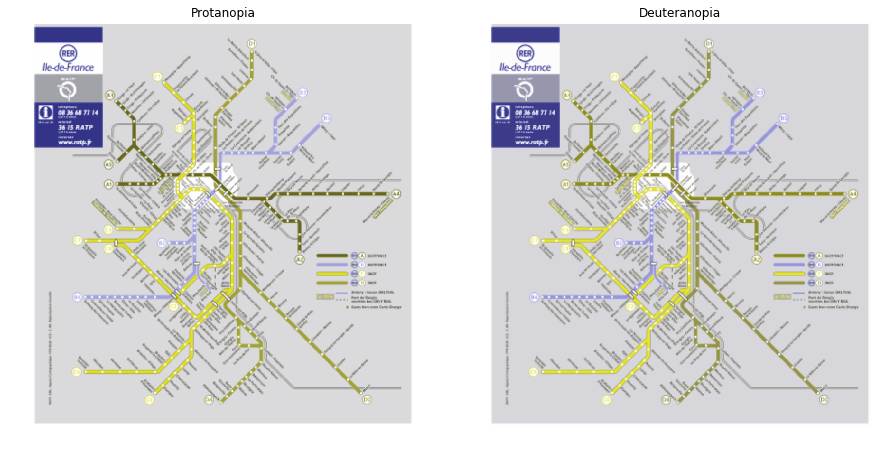

In [16]:
final_pro = np.uint8(255 * pro**(1/2.2))
final_deu = np.uint8(255 * deu**(1/2.2))

f, axarr = plt.subplots(1,2)

f.set_figheight(15)
f.set_figwidth(15)

axarr[0].set_title('Protanopia')
axarr[0].axis('off')
axarr[0].imshow(final_pro)

axarr[1].set_title('Deuteranopia')
axarr[1].axis('off')
axarr[1].imshow(final_deu)

Resultado final das imagens vista por uma portador de protanopia e deuteranopia respectivamente.

## Comparação com as imagens do artigo

Comparamos as imagens geradas após o filtro com as imagens copiadas do próprio artigo

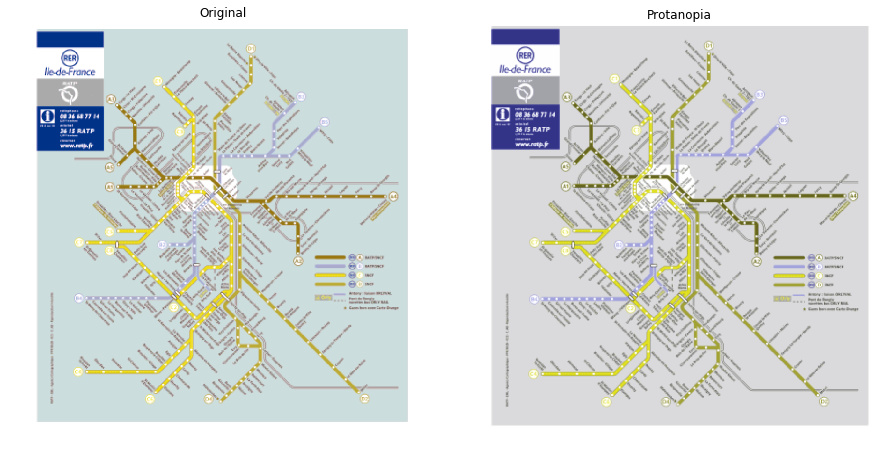

In [17]:
#impotando as imagens de protanopia e deuteranopia do artigo
ori_pro = cv2.imread('protan.png')[:, :, ::-1]
ori_deu = cv2.imread('deutan.png')[:, :, ::-1]

f, axarr = plt.subplots(1,2)

f.set_figheight(15)
f.set_figwidth(15)

axarr[0].set_title('Original')
axarr[0].axis('off')
axarr[0].imshow(ori_pro)

axarr[1].set_title('Protanopia')
axarr[1].axis('off')
axarr[1].imshow(final_pro)


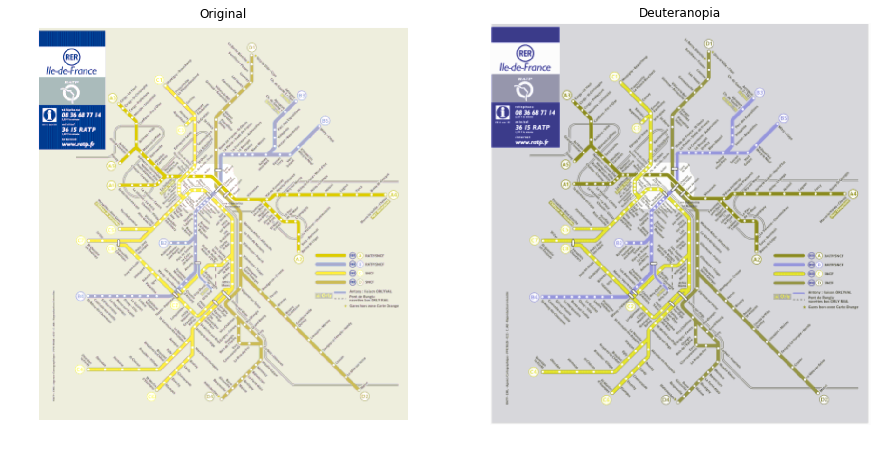

In [18]:
f, axarr = plt.subplots(1,2)

f.set_figheight(15)
f.set_figwidth(15)

axarr[0].set_title('Original')
axarr[0].axis('off')
axarr[0].imshow(ori_deu)

axarr[1].set_title('Deuteranopia')
axarr[1].axis('off')
axarr[1].imshow(final_deu)

## Validação


Pra validar esses resultados pode-se comparar as imagens geradas com as imagens do dadas pelo artigo. Porém, neste caso não é possível saber se as imagens do artigo estão realmente corretas. 

Portanto, uma outra alternativa seria testar com pessoas com esses tipos de daltonismo, protanopia e deuteranopia. O teste consiste basicamente, em pedir para que essas pessoas olhem a imagem original ao lado da imagem simulada e respondam se vêem alguma diferença entre as duas imagens. Caso a diferença na imagem não seja percebida, isso significa que o simulador foi bem-sucedido.

Um outro método de validação, poderia ser usar uma imagem de teste de daltonismo, onde os daltônicos vêem determinados números e quem não possui daltonismo vê outro. Dessa forma, é preciso aplicar as técnicas acima e ver o resultado da imagem e confirmar se é possível identificar o número que um daltônico veria. 

Por fim, uma outra forma seria utilizar um filtro que mostrasse como um daltônico vê, e comparar com o tratamento de imagem feito acima.

Após a validação, para realmente ser possível representar a experiência sensorial de uma pessoa com daltonismo uma das formas é utilizar a câmera (webcam) para simular como um daltônico veria. Outra forma, é utilizar ferramentas de realidade virtual para simular o daltonismo.




## Aplicações

#### Quais as aplicações deste trabalho? Como você usaria esta técnica para melhorar o design de um produto? Que outras aplicações você imagina?

Exemplos de aplicações possíveis são evitar que algo vital ou perigoso não seja visto por uma pessoa daltônica, melhorando sinalizações como as placas e avisos imprescindíveis. Dessa forma, permite que tudo possa ser visto por todos.

Uma melhoria que esta técnica poderia trazer é a verificação das cores em um jogo por exemplo, permitindo que a jogabilidade não seja afetada por questão de coloração do jogo. Ou até mesmo, melhorar a acessibilidade de um aplicativo ou site, tornando mais fácil a leitura e compreensão.

Outras possíveis aplicações é o modo daltonico em jogos. Neste caso, ao contrário do que foi feito, ele não simula o daltonismo, mas sim, modifica as cores para que fique mais fácil de identificar os objetos na tela. 

## Alguns testes com imagens salvas

Essa função foi feita para facilitar os testes com imagens. É um resumo de todos os seis passos acima.

Para simular o daltonismo em uma imagem, basta chamar a função com o nome da imagem.

```python
simulador('imagem.png')
```

In [19]:
def simulador(strimg):
    img = cv2.imread(strimg)
    
    img = img[:, :, ::-1]
    
    rows, cols, colors = img.shape

    new_img = (img / 255.0) ** 2.2
    
    pro_img = (new_img * 0.992052) + 0.003974
    deu_img = (new_img * 0.957237) + 0.0213814
    
    RGB_to_LMS = np.array([[17.8824, 43.5161, 4.11935],
                          [3.45565, 27.1554, 3.86714],
                          [0.0299566, 0.184309, 1.46709]])
    
    pro_array = np.array([pro_img[:,:,0].ravel(), pro_img[:,:,1].ravel(), pro_img[:,:,2].ravel()])
    deu_array = np.array([deu_img[:,:,0].ravel(), deu_img[:,:,1].ravel(), deu_img[:,:,2].ravel()])
    
    LMS_pro = np.matmul(RGB_to_LMS, pro_array)
    LMS_deu = np.matmul(RGB_to_LMS, deu_array)
    
    matrix_pro = np.array([[0, 2.02344, -2.52581],
                           [0, 1, 0],
                           [0, 0, 1]])

    matrix_deu = np.array([[1, 0, 0],
                           [0.494207, 0, 1.24827],
                           [0, 0, 1]])
    
    LMS_pro_trans = np.matmul(matrix_pro, LMS_pro)
    LMS_deu_trans = np.matmul(matrix_deu, LMS_deu)
    
    inv_RGB_to_LMS = ([[0.080944, -0.130504, 0.116721],
                       [-0.0102485, 0.0540194, -0.113615],
                       [-0.000365294, -0.00412163, 0.693513]])
    
    RGB_pro = np.matmul(inv_RGB_to_LMS, LMS_pro_trans)
    RGB_deu = np.matmul(inv_RGB_to_LMS, LMS_deu_trans)
    
    R_pro = np.reshape(RGB_pro[0,:], (rows, cols))
    G_pro = np.reshape(RGB_pro[1,:], (rows, cols))
    B_pro = np.reshape(RGB_pro[2,:], (rows, cols))

    R_deu = np.reshape(RGB_deu[0,:], (rows, cols))
    G_deu = np.reshape(RGB_deu[1,:], (rows, cols))
    B_deu = np.reshape(RGB_deu[2,:], (rows, cols))
    
    pro = np.dstack((R_pro, G_pro, B_pro))
    deu = np.dstack((R_deu, G_deu, B_deu))
    
    final_pro = np.uint8(255 * pro**(1/2.2))
    final_deu = np.uint8(255 * deu**(1/2.2))
    
    f, axarr = plt.subplots(1,3)

    f.set_figheight(15)
    f.set_figwidth(15)

    axarr[0].axis('off')
    axarr[0].set_title('Protanopia')
    axarr[0].imshow(final_pro)
    
    axarr[1].axis('off')
    axarr[1].set_title('Original')
    axarr[1].imshow(img)
    
    axarr[2].axis('off')
    axarr[2].set_title('Deuteranopia')
    axarr[2].imshow(final_deu)

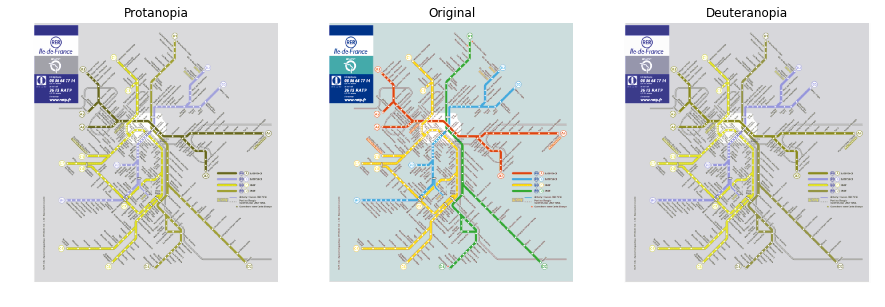

In [20]:
simulador('original.png')

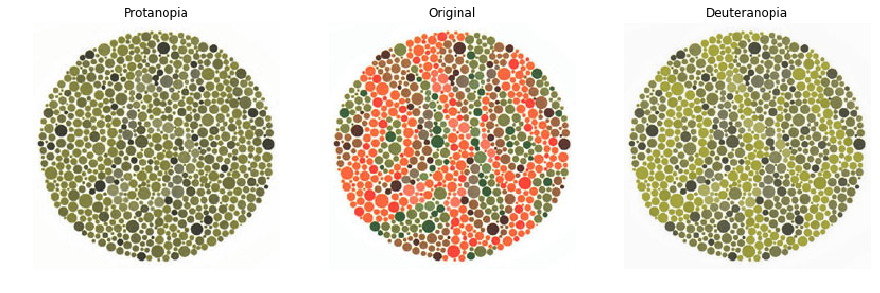

In [21]:
simulador('test01.jpg')

Uma pessoa sem dautonismo: nada

Com dautonismo: 5

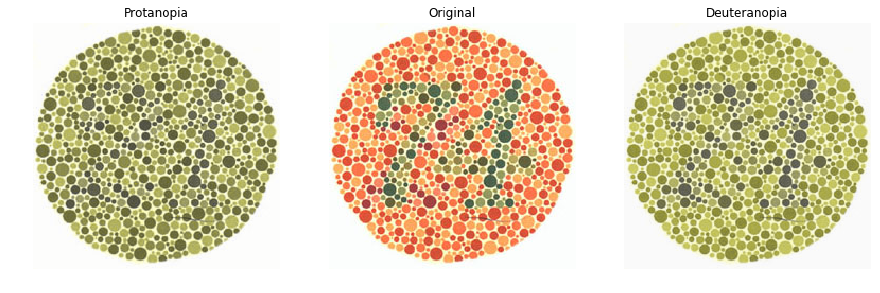

In [22]:
simulador('test02.jpg')

Uma pessoa sem dautonismo: 74

Com dautonismo: 21

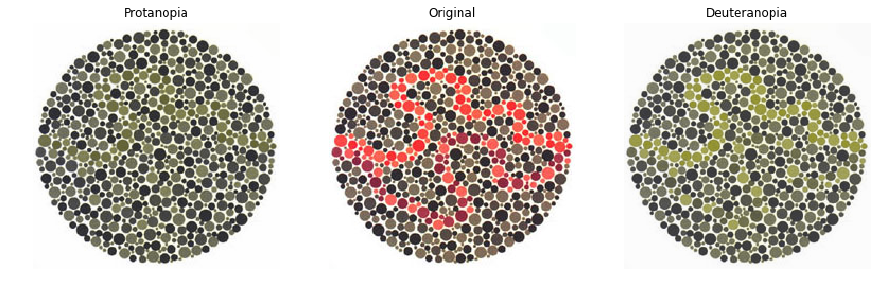

In [23]:
simulador('test03.jpg')

Uma pessoa sem dautonismo: consegue ver o caminho vermelho e roxo

Com protanopia: consegue ver o caminho vermelho com dificuldade

Com Deuteranopia: consegue ver o caminho vermelho, e o roxo com dificuldade

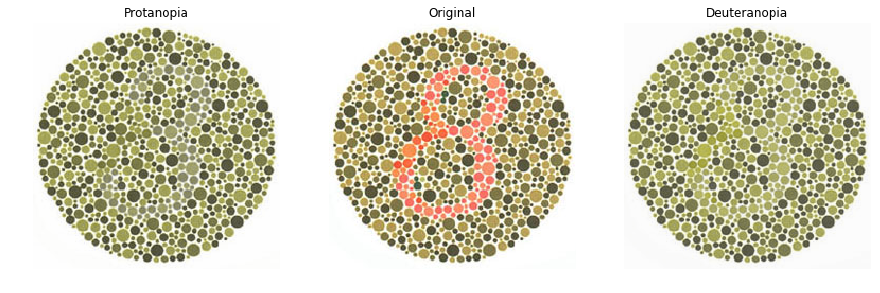

In [24]:
simulador('test04.jpg')

Uma pessoa sem dautonismo: 8

Com dautonismo: 3

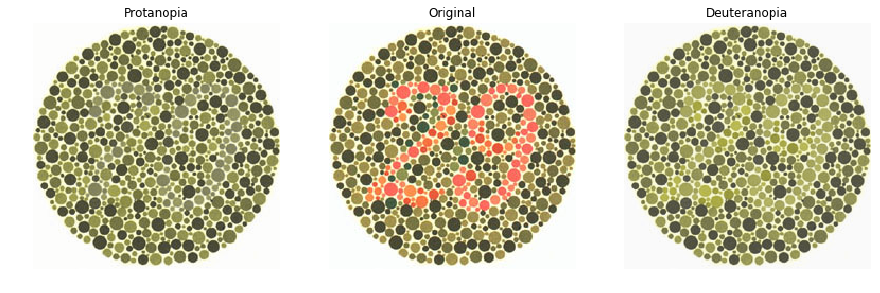

In [25]:
simulador('test05.jpg')

Uma pessoa sem dautonismo: 29

Com dautonismo: 70

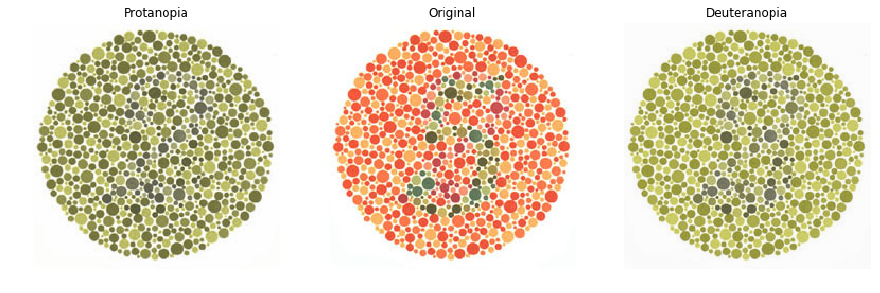

In [26]:
simulador('test06.jpg')

Uma pessoa sem dautonismo: 5

Com dautonismo: 2

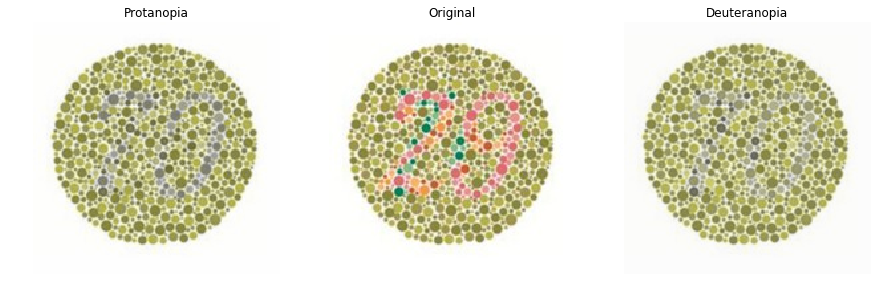

In [27]:
simulador('test07.jpeg')

Uma pessoa sem dautonismo: 29

Com dautonismo: 70

(essa imagem está com uma qualidade diferente, facilitando a visualização)

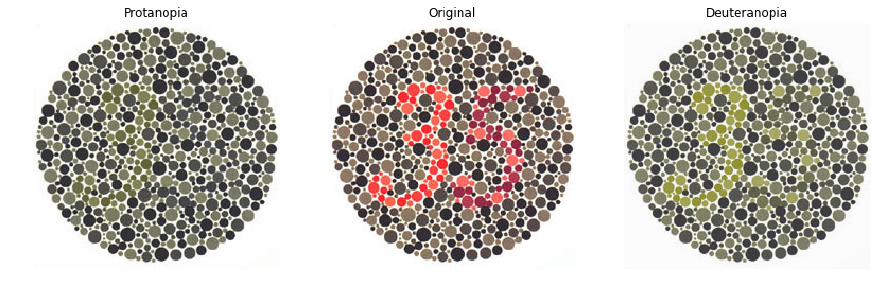

In [28]:
simulador('test08.jpg')

Uma pessoa sem dautonismo: 35

Com dautonismo: 3

## Função que simula o daltonismo em câmeras

Para simular o daltonismo em vídeo da webcam, basta rodar as duas células abaixo. Para que o vídeo funcione é necessário pressionar a tecla `tab` . 

Para finalizar o vídeo pressione `esc`.

In [29]:
def simulador_video(img):
    img = img[:, :, ::-1]
    
    rows, cols, colors = img.shape

    new_img = (img / 255.0) ** 2.2
    
    pro_img = (new_img * 0.992052) + 0.003974
    deu_img = (new_img * 0.957237) + 0.0213814
    
    RGB_to_LMS = np.array([[17.8824, 43.5161, 4.11935],
                          [3.45565, 27.1554, 3.86714],
                          [0.0299566, 0.184309, 1.46709]])
    
    pro_array = np.array([pro_img[:,:,0].ravel(), pro_img[:,:,1].ravel(), pro_img[:,:,2].ravel()])
    deu_array = np.array([deu_img[:,:,0].ravel(), deu_img[:,:,1].ravel(), deu_img[:,:,2].ravel()])
    
    LMS_pro = np.matmul(RGB_to_LMS, pro_array)
    LMS_deu = np.matmul(RGB_to_LMS, deu_array)
    
    matrix_pro = np.array([[0, 2.02344, -2.52581],
                           [0, 1, 0],
                           [0, 0, 1]])

    matrix_deu = np.array([[1, 0, 0],
                           [0.494207, 0, 1.24827],
                           [0, 0, 1]])
    
    LMS_pro_trans = np.matmul(matrix_pro, LMS_pro)
    LMS_deu_trans = np.matmul(matrix_deu, LMS_deu)
    
    inv_RGB_to_LMS = ([[0.080944, -0.130504, 0.116721],
                       [-0.0102485, 0.0540194, -0.113615],
                       [-0.000365294, -0.00412163, 0.693513]])
    
    RGB_pro = np.matmul(inv_RGB_to_LMS, LMS_pro_trans)
    RGB_deu = np.matmul(inv_RGB_to_LMS, LMS_deu_trans)
    
    R_pro = np.reshape(RGB_pro[0,:], (rows, cols))
    G_pro = np.reshape(RGB_pro[1,:], (rows, cols))
    B_pro = np.reshape(RGB_pro[2,:], (rows, cols))

    R_deu = np.reshape(RGB_deu[0,:], (rows, cols))
    G_deu = np.reshape(RGB_deu[1,:], (rows, cols))
    B_deu = np.reshape(RGB_deu[2,:], (rows, cols))
    
    pro = np.dstack((R_pro, G_pro, B_pro))
    deu = np.dstack((R_deu, G_deu, B_deu))
    
    final_pro = np.uint8(255 * pro**(1/2.2))
    final_deu = np.uint8(255 * deu**(1/2.2))
    
    return final_pro, final_deu

Para finalizar o vídeo pressione `esc`

In [30]:
cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()
    
    pro, deu = simulador_video(frame)
    pro = pro[:, :, ::-1]
    deu = deu[:, :, ::-1]

    cv2.imshow('frame',frame)
    cv2.imshow('pro', pro)
    cv2.imshow('deu', deu)
    k = cv2.waitKey() & 0xFF
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

## Conclusão

Pelas imagens gerdas pelo passo 6 é possível notar que as imagens tem uma pequena diferença entre elas. As cores da imagem original (retirada do artigo) tem uma tonalidade mais clara em comparação as das geradas pelo código. Uma das possíveis causas pode ser o fato da qualidade da imagem ter caído ao ser colada no artigo, ou até mesmo na hora em que capturamos uma foto desse artigo. Outra possível causa para essa diferença e mais provável é a diferença entre os monitores, que altera a forma como é vista o pixel. Mas, podemos ver que as tonalidades que sofrem alterações são as mesmas indo para um tom semelhante, validando o nosso programa.

Ao utilizar as imagens de teste de daltonismo, tivemos sucesso em algumas, sendo possível ver exatamente o mesmo número que um daltônico veria. Porém outras ficaram um tanto quando difícil de entender, e as vezes não era possível identificar os números.


Por fim, a câmera mostrou as mudanças de coloração bastante intensas, deixando mais fácil entender como algumas cores trocam de tonalidade. Uma forma interessante de testar a camera é mostrar objetos de coloração roxa e vermelha.

Todos os testes acima foram feitos com daltonicos para verificação do projeto, e os resultados foram muito bons. A maioria viu bastante semelhança entre as imagens originais e as simuladas. 